In [1]:
# Introdução a Data Science
import pandas as pd # padrão por convenção

ratings = pd.read_csv("./ml-latest-small/ratings.csv")

# 5 primeiras linhas
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
# Nro. Linhas e Colunas
ratings.shape

(100836, 4)

In [3]:
# Valores distintos da coluna 'rating'
ratings['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [4]:
# Qtd de instâncias da nota
ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [5]:
# Média das ratings
print("Mean:", ratings['rating'].mean())

# Mediana das ratings
print("Median:", ratings['rating'].median())

Mean: 3.501556983616962
Median: 3.5


<AxesSubplot:>

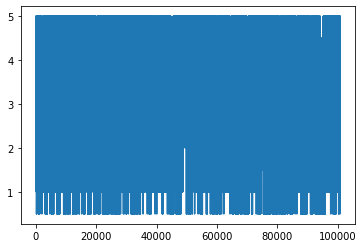

In [6]:
# Imprime o gráfico (ininteligível)
ratings.rating.plot()

<AxesSubplot:ylabel='Frequency'>

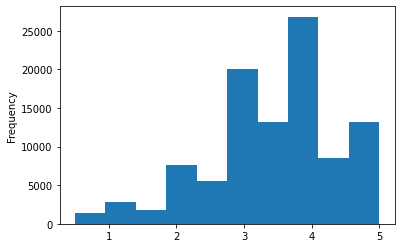

In [7]:
# Histograma
ratings.rating.plot(kind='hist')

In [8]:
# Informações sobre o 'dataset'
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating'>

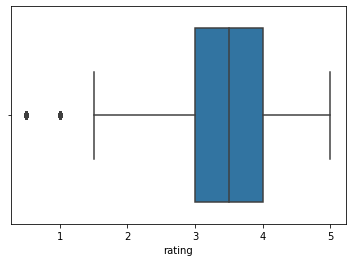

In [9]:
import seaborn as sns # padrão por convenção

sns.boxplot(x=ratings.rating)

In [10]:
movies = pd.read_csv("./ml-latest-small/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
# Notas do filme Toy Story
ratings.query("movieId==1")

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [12]:
# Média das notas do filme Toy Story
ratings.query("movieId==1").rating.mean()

3.9209302325581397

In [13]:
# Média dos Filmes
average_ratings = ratings.groupby("movieId").mean()["rating"]
average_ratings.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

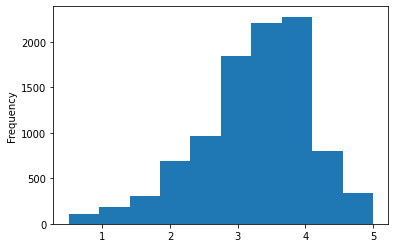

In [14]:
average_ratings.plot(kind="hist")

<AxesSubplot:xlabel='rating'>

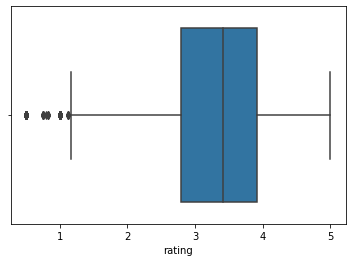

In [15]:
sns.boxplot(x=average_ratings)

In [16]:
average_ratings.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='Count'>

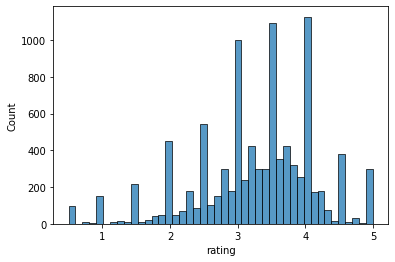

In [17]:
sns.histplot(average_ratings)

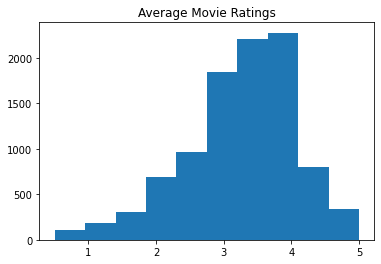

In [18]:
import matplotlib.pyplot as plt

plt.hist(average_ratings)
plt.title("Average Movie Ratings")
#plt.figure(figsize=(400, 600))
plt.show()

In [19]:
tmdb = pd.read_csv("./archive/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
tmdb.original_language.unique() # categórica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# primeiro grau
# segundo grau
# terceiro grau
# 1º grau < 2º grau < 3º grau # categórica ordinal

# budget => orçamento => quantitativo contínuo

In [21]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [22]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [23]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1], dtype=int64)

In [24]:
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [25]:
language_count = tmdb["original_language"].value_counts().to_frame().reset_index()
language_count.columns = ["original_language", "total"]
language_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<AxesSubplot:xlabel='original_language', ylabel='total'>

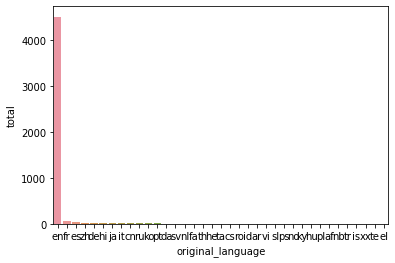

In [26]:
sns.barplot(x="original_language", y="total", data=language_count)

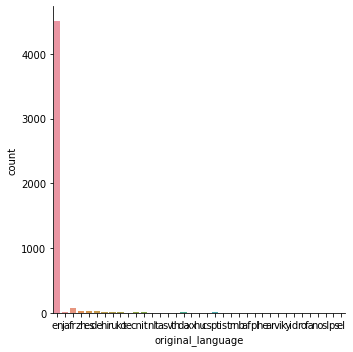

In [27]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

In [28]:
total_per_language = tmdb["original_language"].value_counts()
general_total = total_per_language.sum()
english_total = total_per_language.loc["en"]
rest_total = general_total - english_total
print(english_total, rest_total)

4505 298


In [29]:
data = {
    "language": ["English", "Other"],
    "total": [english_total, rest_total]
}
data = pd.DataFrame(data)
data

,language,total
0,English,4505
1,Other,298


<AxesSubplot:xlabel='language', ylabel='total'>

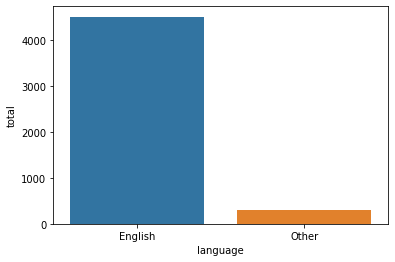

In [30]:
sns.barplot(x = "language", y = "total", data = data)

([<matplotlib.patches.Wedge at 0x2c9d68dc100>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'English'),
  Text(1.0791697511565306, -0.2130555049482467, 'Other')])

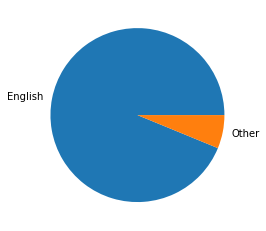

In [31]:
plt.pie(data["total"], labels = data["language"])

In [37]:
total_per_language_other_movies = tmdb.query("original_language != 'en'").original_language.value_counts()
total_per_language_other_movies

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

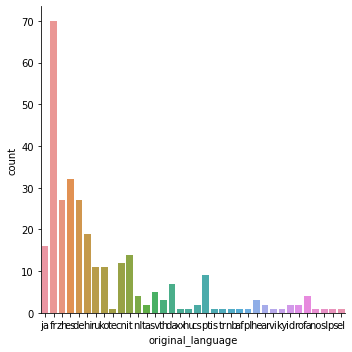

In [40]:
movies_with_original_language_other_than_english = tmdb.query("original_language != 'en'")
sns.catplot(
    x = "original_language"
    , kind = "count"
    , data = movies_with_original_language_other_than_english
)

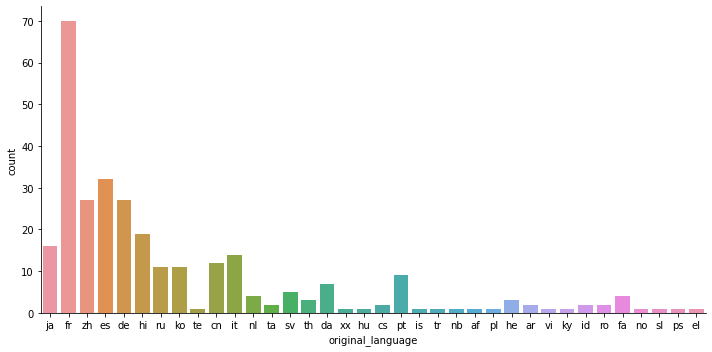

In [39]:
sns.catplot(
    x = "original_language"
    , kind = "count"
    , data = movies_with_original_language_other_than_english
    , aspect = 2 # width
)

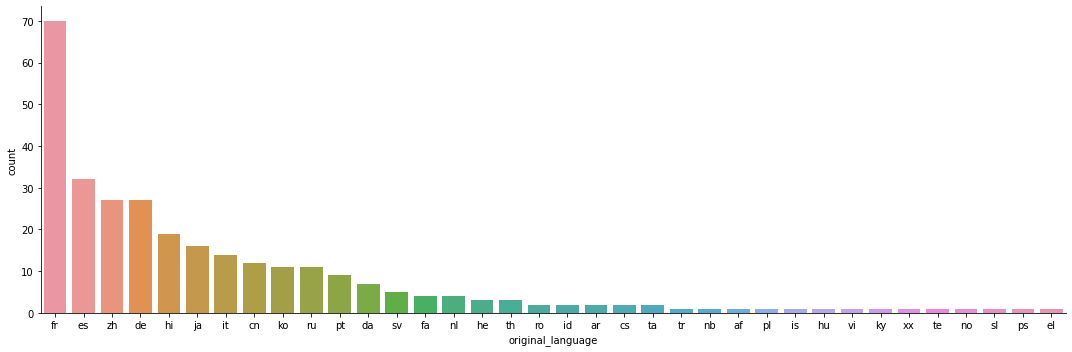

In [44]:
sns.catplot(
    x = "original_language"
    , kind = "count"
    , data = movies_with_original_language_other_than_english
    , aspect = 3 # width
    , order = total_per_language_other_movies.index
)

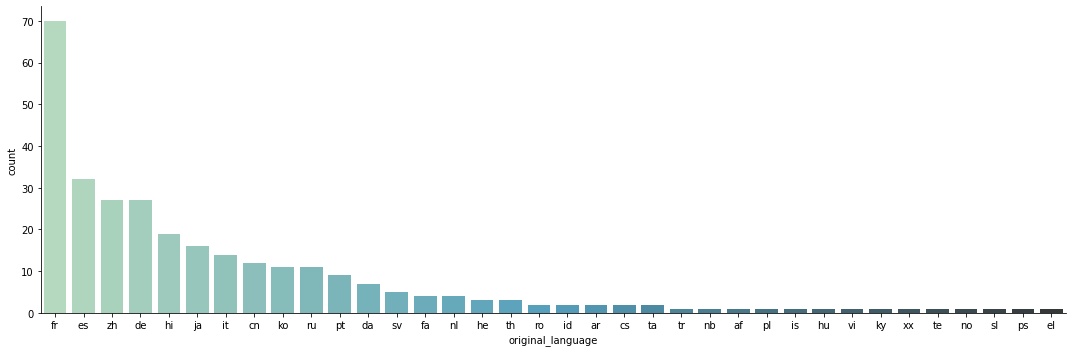

In [49]:
sns.catplot(
    x = "original_language"
    , kind = "count"
    , data = movies_with_original_language_other_than_english
    , aspect = 3 # width
    , palette = "GnBu_d" # "BuGn_r"
    , order = total_per_language_other_movies.index
)

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot e histograma

In [51]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [54]:
toy_story_ratings = ratings.query("movieId == 1")
jumanji_ratings = ratings.query("movieId == 2")
print("Toy Story ratings:", len(toy_story_ratings), "\n", "Jumanji ratings:", len(jumanji_ratings))

Toy Story ratings: 215 
 Jumanji ratings: 110


In [61]:
print("Toy Story's mean rating %.2f" % toy_story_ratings.rating.mean())
print("Toy Story's median rating %.2f" % toy_story_ratings.rating.median())
print("Jumanji's mean rating %.2f" % jumanji_ratings.rating.mean())
print("Jumanji's median rating %.2f" % jumanji_ratings.rating.median())

Toy Story's mean rating 3.92
Toy Story's median rating 4.00
Jumanji's mean rating 3.43
Jumanji's median rating 3.50


In [68]:
import numpy as np

movie1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
movie2 = np.append(np.array([5] * 10), np.array([1] * 10))

print("Movie1 mean:", movie1.mean(), "\n", "Movie1 median:", np.median(movie1))
print("Movie2 mean:", movie2.mean(), "\n", "Movie2 median:", np.median(movie2))

Movie1 mean: 3.0 
 Movie1 median: 3.0
Movie2 mean: 3.0 
 Movie2 median: 3.0


<AxesSubplot:ylabel='Count'>

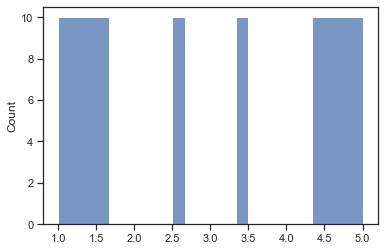

In [78]:
sns.histplot(movie1)
sns.histplot(movie2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

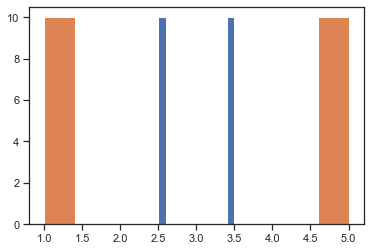

In [80]:
plt.hist(movie1)
plt.hist(movie2)

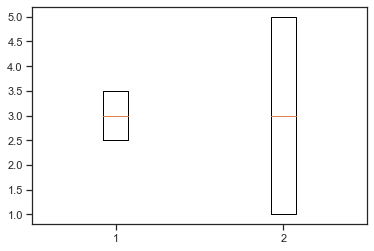

In [83]:
plt.boxplot([movie1, movie2])
plt.show()

<AxesSubplot:xlabel='rating'>

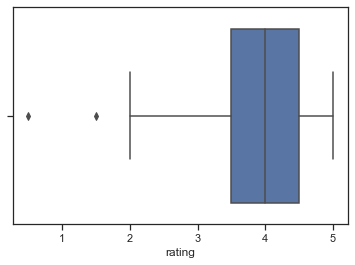

In [93]:
sns.boxplot(x = toy_story_ratings.rating)

<AxesSubplot:xlabel='rating'>

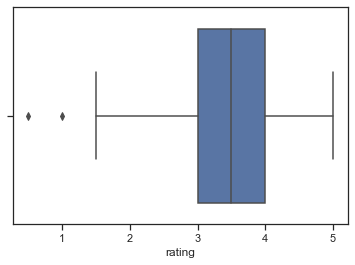

In [95]:
sns.boxplot(x = jumanji_ratings.rating)

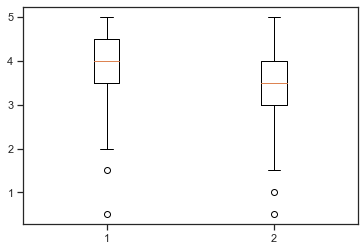

In [98]:
plt.boxplot([toy_story_ratings.rating, jumanji_ratings.rating])
plt.show()

<AxesSubplot:xlabel='movieId', ylabel='rating'>

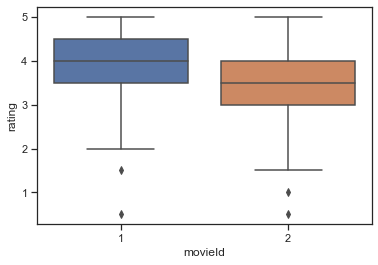

In [100]:
sns.boxplot(x = "movieId", y = "rating", data = ratings.query("movieId in [1, 2]"))